#Project Module 3: Roots
#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

#First, we sill use the Newton-Raphson method to create an algorthm for finding different roots for a function, as seen below:

The Newton-Raphson method is method that uses the equation below to find the root of a function. 

$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$

The program in the following cell contains a recursive method called "newton_raphson," which uses two parameters.

*   The initial x value.
*   The maximum amount of recursions allowed.

The for-loop at the bottom of the cell runs the newton_raphson method ten times, with a different x value each time to show that, in this case, no matter the x, the root will be found.

In [2]:
from tabulate import tabulate

#-----------------------------------------------------------------------

fOFx_equation = "x**3 - 20" #f(x) = " *insert equation here* "
fPOFx_equation = "3*x**2" #f'(x) = " *insert derivative of fOFx_equation here* "

threshold = 0.0001 # 0.01% = 0.0001   error tolerance for stopping iterations

#-----------------------------------------------------------------------

def f(x): # f(x) function
  return eval(fOFx_equation) # runs the string equation with input as the x

def fP(x): # f'(x) function
  return eval(fPOFx_equation) # runs the string equation with input as the x

def newton_raphson(x, maxIterations): # Newton-Raphson function
  global iterationCount
  iterationCount += 1

  if maxIterations > 0:
    old = x
    fOFx = f(x)
    fPOFx = fP(x)
    new = x - (fOFx / fPOFx)  # Newton-Raphson equation - x(sub)i+1 = ...
    eA = abs( ( (new - old) / new) * 100 ) # Relative Approximate Error

    maxIterations -= 1

    table.append( [iterationCount, old, fOFx, fPOFx, new, eA] ) # Writes variable data to a row of a table

    if eA >= threshold: # if Approximate Error >= threshold, recurse function
      newton_raphson(new, maxIterations) # recursion point

#-----------------------------------------------------------------------

for i in range(1, 11):
  iterationCount = 0
  table = []

  print("Initial: x =", i)
  newton_raphson(i, 20) # (first_x_value, maxIterations)   maxIterations limits the amount of possible iterations to avoid errors. Note: the amount of actual iterations could be less than maxIterations
  print(tabulate(table, headers=["Iteration", "x(sub)i", "f(x)", "f'(x)", "x(sub)i+1 (root estimate)", "Relative Approximate Error : %"])) #print entire table
  print("")


Initial: x = 1
  Iteration    x(sub)i           f(x)     f'(x)    x(sub)i+1 (root estimate)    Relative Approximate Error : %
-----------  ---------  -------------  --------  ---------------------------  --------------------------------
          1    1        -19              3                           7.33333                      86.3636
          2    7.33333  374.37         161.333                       5.01286                      46.2905
          3    5.01286  105.967         75.3862                      3.6072                       38.9679
          4    3.6072    26.9367        39.0358                      2.91715                      23.6549
          5    2.91715    4.82435       25.5294                      2.72818                       6.92669
          6    2.72818    0.305772      22.3289                      2.71449                       0.504478
          7    2.71449    0.00153224    22.1053                      2.71442                       0.00255361
          8   

#Next, we chose to use Bisection for this second part, and use it to create another algortihm for finding roots of our function

The program in the following cell contains a recursive method called "bisectionFun," which uses three parameters.

*   The lower x value ("beneath" the root)
*   The upper x value ("above" the root)
*   The maximum amount of recursions allowed.



---



The idea of the bisection method is to find the root by taking two input x's on either side of the root and dividing the distance in half. 

If you multiply: f(lower x)f(middle x) and the result is:

$> 0$ The root is between the halfway point and the upper x  
$< 0$ The root is between the lower x and the halfway point  
$= 0$ The root is the halfway point  

If we do not get "= 0", we make the previously mentioned middle point, the new lower x or upper x value, and continue the cycle until we get within a preset threshold of the root or the actual root.

The bisectionFun method runs once in the following cell, and in the case below, the root is between the two x's values so that the root will be found or estimated.

In [3]:
from tabulate import tabulate

#-----------------------------------------------------------------------

fOFx_equation = "x**3 - 20" #f(x) = " *insert equation here* "

threshold = 0.0001 # 0.01% = 0.0001   error tolerance for stopping iterations

#-----------------------------------------------------------------------

def f(x): # f(x) function
  return eval(fOFx_equation) # runs the string equation with input as the x

def bisectionFun(xLowr, xUppr, maxIterations): # Newton-Raphson function
  global iterationCount
  global oldXMid

  if maxIterations > 0: # iteration limit
    maxIterations -= 1

    if iterationCount <= 0: # if it is the first iteration (there will be no Relative Approximate Error)
      table.append( ["Initial Values", xLowr, xUppr, (xLowr + xUppr) / 2, "null"] ) # Writes variable data to a row of a table

      oldXMid = (xLowr + xUppr) / 2

      mult = f(xLowr)*f(oldXMid)

      if mult > 0:
        xLowr = oldXMid
      elif mult < 0:
        xUppr= oldXMid
      else:
        print("\nExact root calculated")
        maxIterations = 0

      eA = threshold*2 # this is needed for the program to not display an error. This line does nothing else

    else:
      newXMid = (xLowr + xUppr) / 2

      mult = f(xLowr)*f(newXMid)

      oldXLowr = xLowr
      oldXUppr = xUppr

      if mult > 0:
        xLowr = newXMid
      elif mult < 0:
        xUppr= newXMid
      else:
        print("\nExact root calculated")
        maxIterations = 0

      eA = abs( ( (newXMid - oldXMid) / newXMid) * 100 ) # Relative Approximate Error

      oldXMid = newXMid

      table.append( [iterationCount, xLowr, xUppr, (xLowr + xUppr) / 2, eA] ) # Writes variable data to a row of a table

    iterationCount += 1
    if eA > threshold:
      bisectionFun(xLowr, xUppr, maxIterations)

#-----------------------------------------------------------------------

x1 = 1
x2 = 4

oldXMid = 0
iterationCount = 0
table = []

print("Initial: x1 =", x1, ", x2 =", x2)
bisectionFun(x1, x2, 50) # (first_x_value, maxIterations)   maxIterations limits the amount of possible iterations to avoid errors. Note: the amount of actual iterations could be less than maxIterations
print(tabulate(table, headers=["Iteration", "Lower X Value", "Upper X Value", "Middle X Value", "Relative Approximate Error : %"])) #print entire table
print("")



Initial: x1 = 1 , x2 = 4
Iteration         Lower X Value    Upper X Value    Middle X Value  Relative Approximate Error : %
--------------  ---------------  ---------------  ----------------  --------------------------------
Initial Values          1                4                 2.5      null
1                       2.5              3.25              2.875    23.076923076923077
2                       2.5              2.875             2.6875   13.043478260869565
3                       2.6875           2.875             2.78125  6.976744186046512
4                       2.6875           2.78125           2.73438  3.3707865168539324
5                       2.6875           2.73438           2.71094  1.7142857142857144
6                       2.71094          2.73438           2.72266  0.8645533141210375
7                       2.71094          2.72266           2.7168   0.430416068866571
8                       2.71094          2.7168            2.71387  0.2156721782890007
9       

#We find points along a function and use Lagrange interpolation to find another point.

In the next cell, we use Lagrange interpolation from last week's project, which is within a method called "lagrangeFun," and the graph the results from the explanation here: 

The first three multicolored connected lines are connected via four points: 

$(center, f(center))$  
$(center + 0.1, f(center + 0.1))$  
$(center + 0.2, f(center + .02)$  
$(center * 2, f(center * 2)$  

The dashed lines that intersect along the function and between the dashed lines result from a Lagrange interpolation. 

We then repeated this process two more times. Like above, the second and third sets of connected lines result from the four points but are given higher center values and different Lagrange interpolation inputs for their own intersecting dashed lines. 

To summarize, we have three disconnected sets of three connected lines and their corresponding Lagrange interpolation points, represented as intersecting dashed lines. The only difference between the disconnected lines is the x value parameter or "center" and the parameter chosen for the Lagrange interpolation point.

All this, of course, is placed on top of the original function.


Iteration: 1

Center: 0.55
Center Values: [0.35, 0.44999999999999996, 0.55, 0.7]
f(Center Values): [-0.37087499999999984, -0.10762500000000008, 0.09262500000000007, 0.2879999999999999]

Lagrange:
Input X: 0.55
f(Input X): 0.09262500000000007

----------------------------------------------

Iteration: 2

Center: 1.75
Center Values: [1, 1.1, 1.2, 2]
f(Center Values): [0.375, 0.33599999999999997, 0.273, -0.375]

Lagrange:
Input X: 1.75
f(Input X): -0.234375

----------------------------------------------

Iteration: 3

Center: 2.6
Center Values: [2.25, 2.35, 2.45, 4.5]
f(Center Values): [-0.328125, -0.23587499999999995, -0.09262499999999974, 24.0]

Lagrange:
Input X: 2.6
f(Input X): 0.23100000000000032

----------------------------------------------


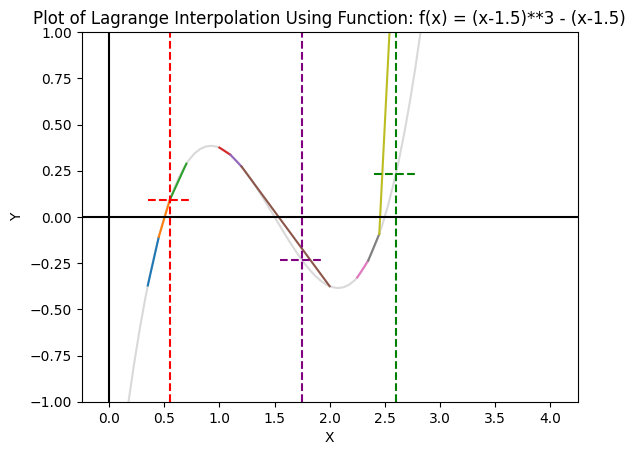

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#-----------------------------------------------------------------------

center = 0.35
xIN = 0.5
equationString = "(x-1.5)**3 - (x-1.5)"

#-----------------------------------------------------------------------

# Define the x range for the plot
x = np.linspace(-25, 25, 1000)

# Plot the function over the x range
plt.plot(x, f(x), color="#D9D9D9")

#-----------------------------------------------------------------------

def f(x):
    return eval(equationString)

#-----------------------------------------------------------------------

def lagrangeFun(xIN, xVals):
  sum = 0

  n = len(xVals)
  for i in range(n):
    jloop = 1
    jloop *= fOFxVals[i]

    for j in range(n):
      if j != i:
        jloop *= (xIN - xVals[j]) / (xVals[i] - xVals[j])
    
    sum += jloop
  return sum

#-----------------------------------------------------------------------

for i in range(3):
  if i == 0:
    center = 0.35
    xIN = 0.55
    coolColor = "red"
  elif i == 1: 
    center = 1
    xIN = 1.75
    coolColor = "purple"
  elif i == 2: 
    center = 2.25
    xIN = 2.6
    coolColor = "green"

  xVals = [center, center + 0.1, center + 0.2, center * 2]
  fOFxVals = []

  for j in range(len(xVals)):
    fOFxVals.append( f(xVals[j]) )

  lagrange = lagrangeFun(xIN, xVals)
  
  print("\nIteration:", i+1)
  print()
  print("Center:", xIN)
  print("Center Values:", xVals)
  print("f(Center Values):", fOFxVals)
  print("\nLagrange:")
  print("Input X:", xIN)
  print("f(Input X):", lagrange)
  print("\n----------------------------------------------")

  # Plot the x and f(x) points connected
  for i in range(len(xVals)):
    if i != len(xVals)-1:
      plt.plot([ xVals[i], xVals[i+1] ], [ fOFxVals[i], fOFxVals[i+1] ])

  # Plot the lagrange point lines
  plt.axvline(x=xIN, color=coolColor, linestyle='--') # lagrange x
  plt.plot([xIN-0.2, xIN+0.2], [lagrange, lagrange], linestyle='--', color=coolColor) # lagrange y


#-----------------------------------------------------------------------

# Plot the x and y axis
plt.axvline(x=0, color='black') #x axis
plt.plot([-100, 100], [0, 0], color='black') #y axis

# Set the x and y limits
xGap = 0.5
yGap = 0.5
plt.xlim(-0.25, 4.25)
plt.ylim(-1, 1)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Lagrange Interpolation Using Function: f(x) = (x-1.5)**3 - (x-1.5)')

# Show the plot
plt.show()

#Finally, we use the previous center and Lagrange interpolation results to calculate their roots.

In the next cell, we use the three center values from the last cell as the lower x values and their corresponding Lagrange interpolation points as the upper x values. These x values will serve as input parameters for running the bisection method. We will find each root in the given function by applying this in a for loop three times, once for each root.

In [ ]:
equationString = "(x-1.5)**3 - (x-1.5)" # "x**3 - x" "0.1*x + 0.25*x**3 - 10"
fPOFx_equation = "3(x-1.5)**2 - 1" #f'(x) = " *insert derivative of fOFx_equation here* "

threshold = 0.0001 # 0.01% = 0.0001   error tolerance for stopping iterations

#-----------------------------------------------------------------------

def f(x):
  return eval(equationString)

def bisectionFun(xLowr, xUppr, maxIterations): # Newton-Raphson function
  global iterationCount
  global oldXMid

  if maxIterations > 0: # iteration limit
    maxIterations -= 1

    if iterationCount <= 0: # if it is the first iteration (there will be no Relative Approximate Error)
      table.append( ["Initial Values", xLowr, xUppr, (xLowr + xUppr) / 2, "null"] ) # Writes variable data to a row of a table

      oldXMid = (xLowr + xUppr) / 2

      mult = f(xLowr)*f(oldXMid)

      if mult > 0:
        xLowr = oldXMid
      elif mult < 0:
        xUppr= oldXMid
      else:
        print("\nExact root calculated")
        maxIterations = 0

      eA = threshold*2 # this is needed for the program to not display an error. This line does nothing else

    else:
      newXMid = (xLowr + xUppr) / 2

      mult = f(xLowr)*f(newXMid)

      oldXLowr = xLowr
      oldXUppr = xUppr

      if mult > 0:
        xLowr = newXMid
      elif mult < 0:
        xUppr= newXMid
      else:
        print("\nExact root calculated")
        maxIterations = 0

      eA = abs( ( (newXMid - oldXMid) / newXMid) * 100 ) # Relative Approximate Error

      oldXMid = newXMid

      table.append( [iterationCount, xLowr, xUppr, (xLowr + xUppr) / 2, eA] ) # Writes variable data to a row of a table

    iterationCount += 1
    if eA > threshold:
      bisectionFun(xLowr, xUppr, maxIterations)

#-----------------------------------------------------------------------

for i in range(3):
  if i == 0:
    center = 0.35
    xIN = 0.55
    coolColor = "orange"
  elif i == 1: 
    center = 1
    xIN = 1.75
    coolColor = "purple"
  elif i == 2: 
    center = 2.25
    xIN = 2.6
    coolColor = "green"

  xVals = [center, center + 0.1, center + 0.2, center * 2]
  fOFxVals = []

  for j in range(len(xVals)):
    fOFxVals.append( f(xVals[j]) )

  lagrange = lagrangeFun(xIN, xVals)
  
  print("\nRoot {}:".format(i+1))
  print()
  print("Center:", xIN)
  print("Center Values:", xVals)
  print("f(Center Values):", fOFxVals)
  print("\nLagrange:")
  print("Input X:", xIN)
  print("f(Input X):", lagrange)
  

  x1 = xVals[0]
  x2 = xIN

  print("\nBisection Method:")

  oldXMid = 0
  iterationCount = 0
  table = []
  print("Initial: x1 = Center, x2 = Lagrange")
  print("Initial: x1 =", x1, ", x2 =", x2)
  print()
  bisectionFun(x1, x2, 20) # (first_x_value, maxIterations)   maxIterations limits the amount of possible iterations to avoid errors. Note: the amount of actual iterations could be less than maxIterations
  print(tabulate(table, headers=["Iteration", "Lower X Value", "Upper X Value", "Middle X Value", "Relative Approximate Error : %"])) #print entire table
  print("\n----------------------------------------------")


#Conclusion

We found that in using the Newton-Raphson method, it is a very accurate tool in approximating and finding roots for a function, $f$. Also, we found that lagrange interpolation and the Newsom-Raphson method are two very interesting things to put into code and see work because of all of the information that they spit out. Lastly, we chose to use Bisection for our second part, and that gave us the exact roots we were looking for. 

We found that the Newton-Raphson method efficiently approximates or finds the roots of a function. Also, we found that a Lagrange interpolation is a very accurate way to find a point and can be an excellent use as an input parameter for using the Newsom-Raphson and bisection methods. We also found that the bisection method is a trade-off between simplicity and efficiency. While the concept of the bisection method is more straightforward, it is a less efficient use of resources to calculate roots.

Generally speaking, when searching for roots, it is appropriate to use the Newton-Raphson method in cases where a single given $x$ value, high efficiency is a significant factor, and simplicity is not a significant factor. The algorithm we chose, bisection, uses two input $x$ values from both sides of the root to isolate it, making it another accurate root-finding tool. It is appropriate to use the bisection method in situations where there are two given  $x$ values, high efficiency is not a significant factor, and simplicity is a significant factor. 

Finally, we found that our initial seed played into the accuracy of the root in both Newton-Raphson and bisection methods. The Newton-Raphson method seemed to have less variability in the number of iterations needed to find the root. In comparison, the bisection method appeared to have a higher variability in the number of iterations required to find the root. Using Lagrange interpolation and the four points based on the center, we can narrow down seed values that could decrease the number of iterations needed to find the roots in both methods, which is a convenient and significant tool.